In [2]:
#to load the data
import pandas as pd
data=pd.read_csv(r"C:\Users\Trisha\Downloads\diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#to get the information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
#to know more about the dataset
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
#let us check if our dataset have NULL values or not
data.isnull().head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [6]:
#as it is a bit complicated to check the null values from this huge dataset we will check the number of NULL values our dataset have
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

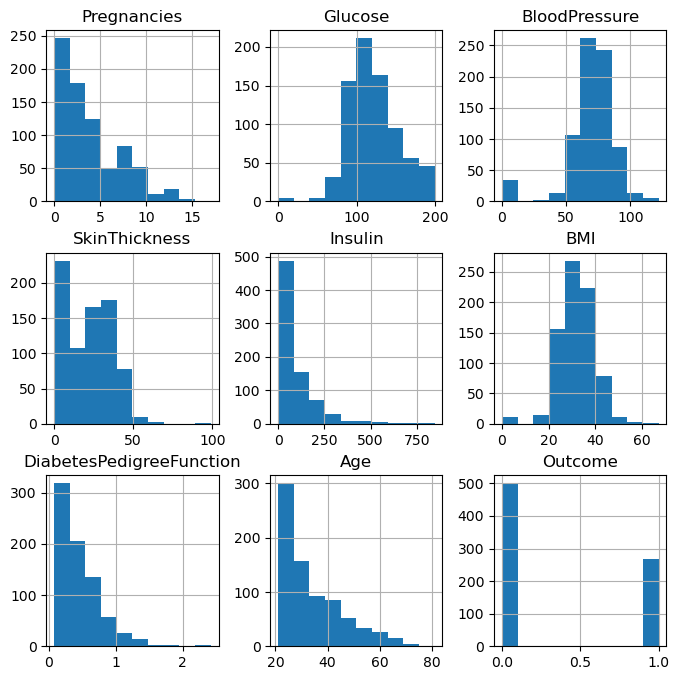

In [19]:
#data visualization
#data distribution plot before we remove NULL values from our dataset
p1=data.hist(figsize=(8,8))

In [8]:
# Handling missing values using mean imputation
data.fillna(data.mean(), inplace=True)


In [9]:
#to Verify if missing values are handled
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

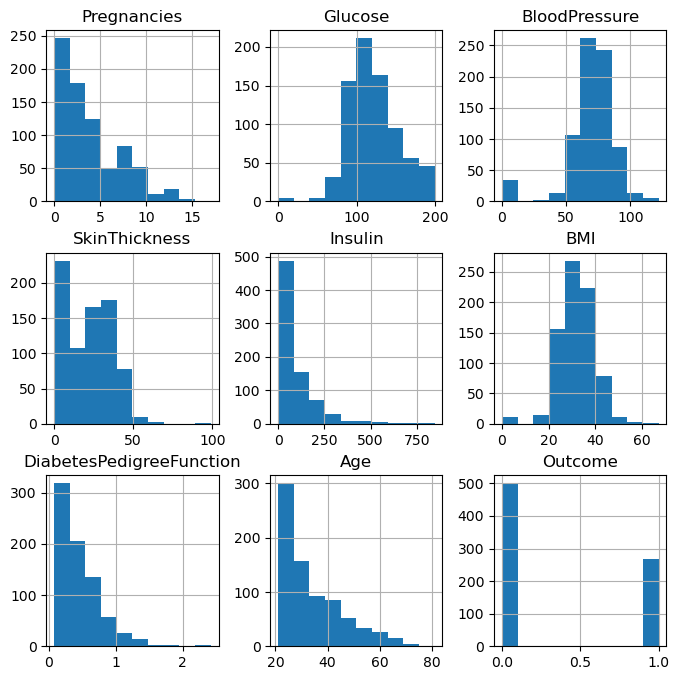

In [18]:
#data distribution plot after handling the missing values
data.hist(figsize=(8,8))

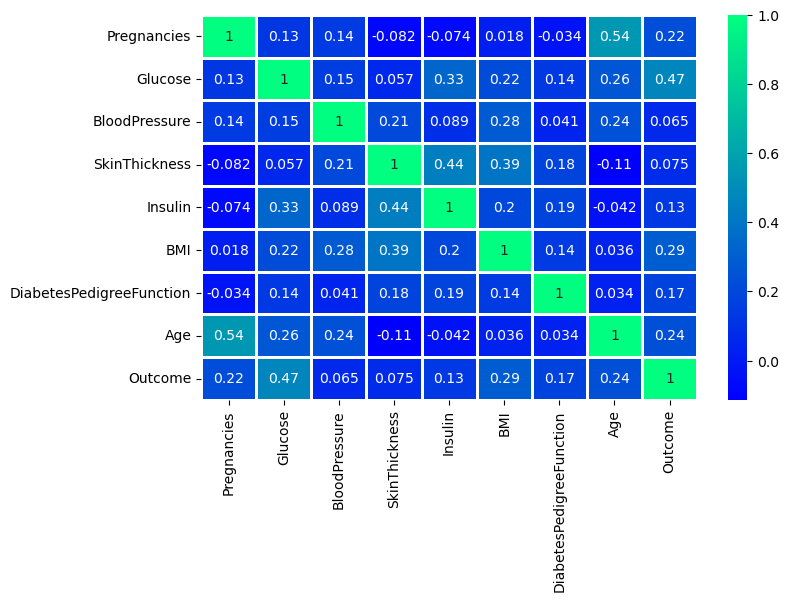

In [24]:
#to get the correlation between all the features in our dataset
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
#we will use seaborn as it has an easy method to showcase heatmap
p2 = sns.heatmap(data.corr(), annot=True, linewidths=1, cmap='winter')

0    500
1    268
Name: Outcome, dtype: int64


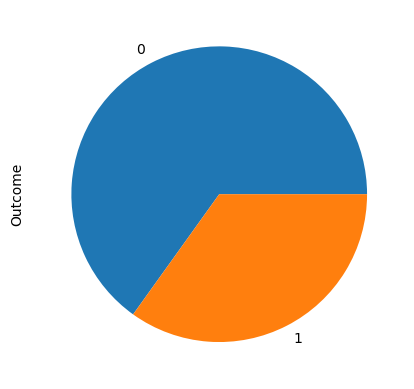

In [26]:
#check that how well our outcome column is balanced
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = data["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(data.Outcome.value_counts())
p=data.Outcome.value_counts().plot(kind="pie")

In [27]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
import numpy as np

data_copy = data.copy(deep = True) # making a copy of the dataset
scaler = StandardScaler()
data_scalled =  pd.DataFrame(scaler.fit_transform(data_copy.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
data_scalled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [28]:
# MODEL BUILDING

from sklearn.model_selection import train_test_split

#splitting the dataset
f=data.drop(['Outcome'],axis=1)
t=data['Outcome']

#now we will split the dataset into training and testing data
f_train,f_test,t_train,t_test=train_test_split(f,t,test_size=0.2,random_state=42)

# MODEL EVALUATION
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [29]:
# building the model using 'DECISION TREE'
from sklearn.tree import DecisionTreeClassifier

# creating a decision tree model
dcsn_tree=DecisionTreeClassifier()

# model training
dcsn_tree.fit(f_train,t_train)

# Make predictions on the test set
t_predd = dcsn_tree.predict(f_test)

# Calculate evaluation metrics
accuracy = accuracy_score(t_test, t_predd)
precision = precision_score(t_test, t_predd)
recall = recall_score(t_test, t_predd)
f1 = f1_score(t_test, t_predd)

# Display the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Accuracy: 0.7467532467532467
Precision: 0.6379310344827587
Recall: 0.6727272727272727
F1 Score: 0.6548672566371682


In [30]:
# Building the model using 'RandomForest'
from sklearn.ensemble import RandomForestClassifier

#creating a RandomForest model
rand_forst=RandomForestClassifier()

# Train the model
rand_forst.fit(f_train,t_train)

# make prediction on the test set
t_predr=rand_forst.predict(f_test)

# calculate evaluation matrices
accuracy = accuracy_score(t_test, t_predr)
precision = precision_score(t_test, t_predr)
recall = recall_score(t_test, t_predr)
f1 = f1_score(t_test, t_predr)

from sklearn import metrics
# Display the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.7402597402597403
Precision: 0.6363636363636364
Recall: 0.6363636363636364
F1 Score: 0.6363636363636364


In [31]:
# building the model using 'LOGISTICREGRESSION'

from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
lreg = LogisticRegression(max_iter=1000)

# Train the model
lreg.fit(f_train, t_train)

# Make predictions on the test set
t_predl = lreg.predict(f_test)

# Calculate evaluation metrics
accuracy = accuracy_score(t_test, t_predl)
precision = precision_score(t_test, t_predl)
recall = recall_score(t_test, t_predl)
f1 = f1_score(t_test, t_predl)

# Display the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7467532467532467
Precision: 0.6379310344827587
Recall: 0.6727272727272727
F1 Score: 0.6548672566371682


<AxesSubplot:>

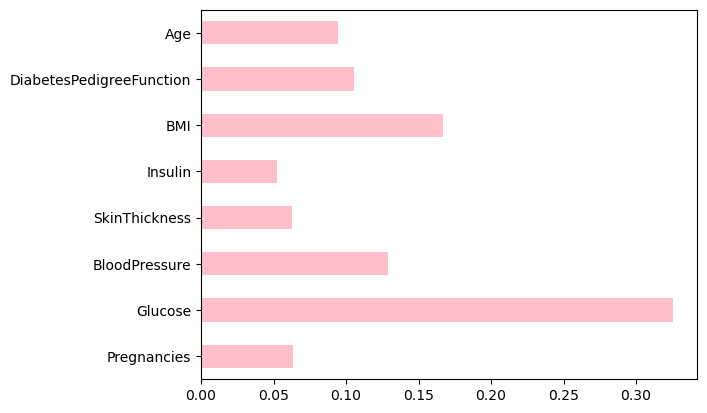

In [34]:
# Therefore DECISION TREE model is the best model for this predic
# Getting feature importances
dcsn_tree.feature_importances_

# As it's a bit complicated to understanf from values, let us visualize the feature importance by plotting the it
(pd.Series(dcsn_tree.feature_importances_, index=f.columns).plot(kind='barh',color="pink"))

In [35]:
#from the above graph, it is clearly visible that Glucose as a feature is the most important in this dataset.

# model saving
import pickle

# using dump() function to save the model
saved_model = pickle.dumps(dcsn_tree)

# loading the saved model
load_model=pickle.loads(saved_model)

# let us make prediction
load_model.predict(f_test)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
      dtype=int64)

In [37]:
# let us check our data set gain
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [38]:
# let us check our dataset from the tail to make sure there is not any issue and our model is ready to give the right prediction
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [21]:
dcsn_tree.predict([[1,126,60,0,0,30.1,0.349,47]])

C:\Users\Trisha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)